In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('ridge_lasso_dataset.csv')

In [6]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,54.967142,51.322782,48.171780,33.891805,8.649643,193.259587
1,48.617357,47.574455,41.667787,27.244071,9.710963,178.837800
2,56.476885,48.032062,45.360399,25.909006,8.415160,175.758991
3,65.230299,59.833207,50.243429,29.983128,9.384077,198.437725
4,47.658466,41.591334,40.221443,29.149077,6.212771,135.846927


In [7]:
df.shape

(500, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  500 non-null    float64
 1   Feature_2  500 non-null    float64
 2   Feature_3  500 non-null    float64
 3   Feature_4  500 non-null    float64
 4   Feature_5  500 non-null    float64
 5   Target     500 non-null    float64
dtypes: float64(6)
memory usage: 23.6 KB


In [9]:
corr_matrix = df.corr()
print(corr_matrix)


           Feature_1  Feature_2  Feature_3  Feature_4  Feature_5    Target
Feature_1   1.000000   0.975690   0.930316   0.064140  -0.008269  0.829784
Feature_2   0.975690   1.000000   0.913487   0.058905  -0.002517  0.815825
Feature_3   0.930316   0.913487   1.000000   0.052929  -0.023825  0.774194
Feature_4   0.064140   0.058905   0.052929   1.000000  -0.087760  0.131281
Feature_5  -0.008269  -0.002517  -0.023825  -0.087760   1.000000 -0.025045
Target      0.829784   0.815825   0.774194   0.131281  -0.025045  1.000000


In [10]:
print("\nCorrelation with Target:\n")
print(corr_matrix["Target"].sort_values(ascending=False))



Correlation with Target:

Target       1.000000
Feature_1    0.829784
Feature_2    0.815825
Feature_3    0.774194
Feature_4    0.131281
Feature_5   -0.025045
Name: Target, dtype: float64


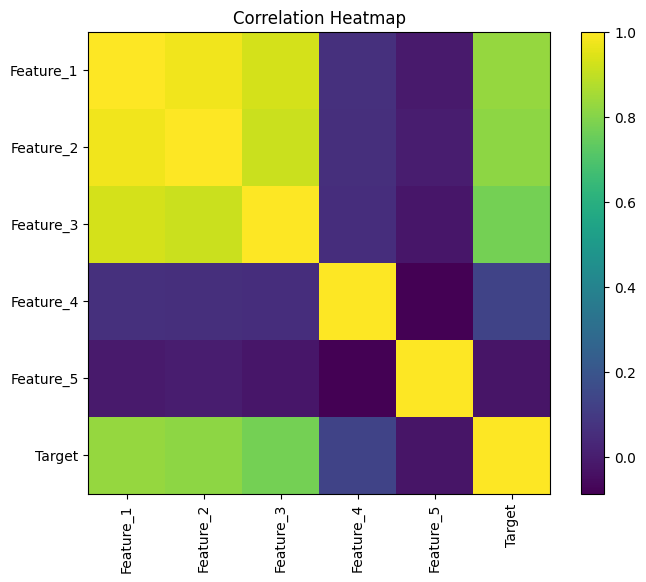

In [11]:
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix)
plt.colorbar()

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title("Correlation Heatmap")
plt.show()


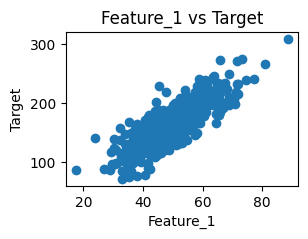

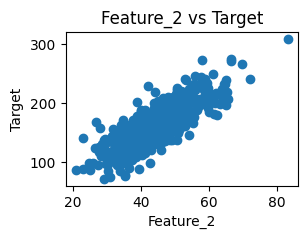

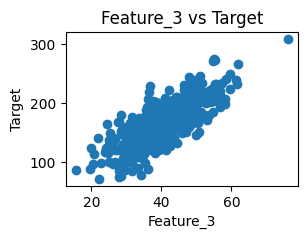

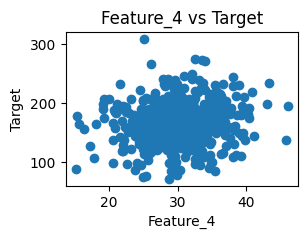

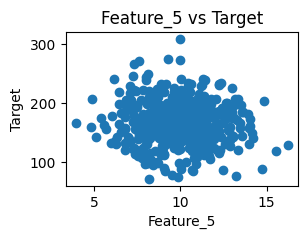

In [12]:
features = ["Feature_1", "Feature_2", "Feature_3", "Feature_4", "Feature_5"]

for feature in features:
    plt.figure(figsize=(3,2))
    plt.scatter(df[feature], df["Target"])
    plt.xlabel(feature)
    plt.ylabel("Target")
    plt.title(f"{feature} vs Target")
    plt.show()


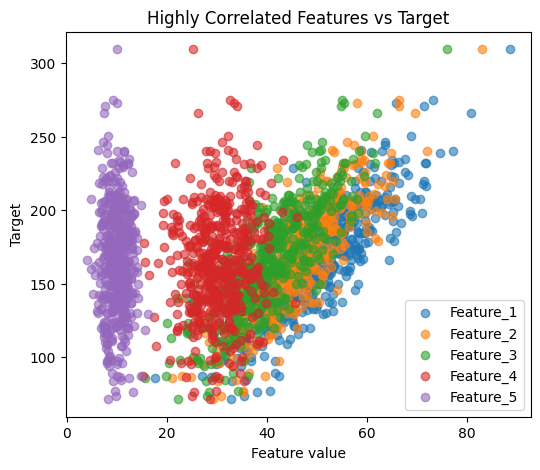

In [13]:
plt.figure(figsize=(6,5))
plt.scatter(df["Feature_1"], df["Target"], label="Feature_1", alpha=0.6)
plt.scatter(df["Feature_2"], df["Target"], label="Feature_2", alpha=0.6)
plt.scatter(df["Feature_3"], df["Target"], label="Feature_3", alpha=0.6)
plt.scatter(df["Feature_4"], df["Target"], label="Feature_4", alpha=0.6)
plt.scatter(df["Feature_5"], df["Target"], label="Feature_5", alpha=0.6)
plt.legend()
plt.xlabel("Feature value")
plt.ylabel("Target")
plt.title("Highly Correlated Features vs Target")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#train test split data
x=df[['Feature_1' ,'Feature_2' ,'Feature_3' ,'Feature_4' ,'Feature_5']]
y=df['Target']
x_train ,x_test , y_train ,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#model train
model = LinearRegression()
model.fit(x_train,y_train)

#prediction
y_pred = model.predict(x_test)

#prediction for train data
y_pred_train = model.predict(x_train)

#r2 score
print(f'r2 score for test data: {r2_score(y_test , y_pred)}')
print(f'r2 score for train data: {r2_score(y_train , y_pred_train)}')




r2 score for test data: 0.686027956632874
r2 score for train data: 0.6961359916293537


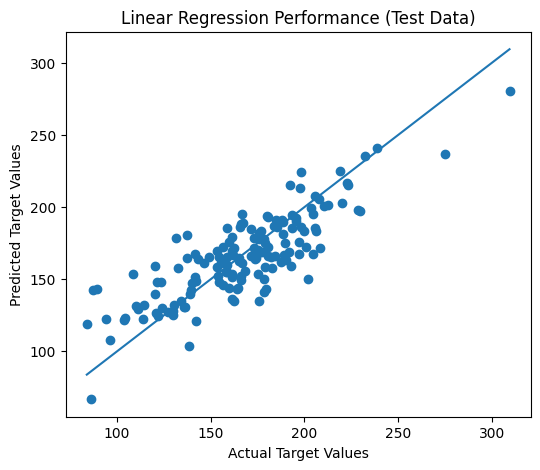

In [15]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Linear Regression Performance (Test Data)")

# Perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

plt.show()


# ridge regression

In [16]:
from sklearn.linear_model import Ridge , Lasso

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

alphas = [0.01, 0.1, 1, 10, 50, 100]

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    print(f"Ridge alpha={a}, R2={r2_score(y_test, y_pred)}")





Ridge alpha=0.01, R2=0.6860325946808403
Ridge alpha=0.1, R2=0.6860723803051492
Ridge alpha=1, R2=0.6863119058887373
Ridge alpha=10, R2=0.6845530173446958
Ridge alpha=50, R2=0.6775447631777882
Ridge alpha=100, R2=0.6712622651457003


In [17]:
from sklearn.linear_model import RidgeCV, LassoCV

ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

print("Best Ridge alpha:", ridge_cv.alpha_)
print("Best Lasso alpha:", lasso_cv.alpha_)


Best Ridge alpha: 1.0
Best Lasso alpha: 0.1


# lasso Regression

In [18]:
from sklearn.linear_model import Ridge , Lasso


lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled,y_train)

lasso_y_pred = lasso.predict(X_test_scaled)

print(f'r2 score for test data: {r2_score(y_test , lasso_y_pred)}')



r2 score for test data: 0.6867787355527635


In [19]:
coef_df = pd.DataFrame({
    "Feature": x.columns,
    "Linear": model.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})

print(coef_df)


     Feature    Linear      Ridge      Lasso
0  Feature_1  2.611012  10.781069  25.889649
1  Feature_2  0.168621   9.284096   1.433506
2  Feature_3  0.338907   7.572719   2.735336
3  Feature_4  0.776189   3.196434   3.681231
4  Feature_5 -0.633580  -1.017434  -1.117818


in this dataset it doesn't improve r2 score cause linear regression perform optimal but lasso and ridge shrinks the coefficients